In [ ]:
import pandas as pd
import numpy as np
from os import getcwd, chdir
from google.colab import drive
drive.mount('/content/drive/')
chdir('drive/MyDrive/tutorial-data')

Mounted at /content/drive/


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/tutorial-data/rollingsales_bronx.xlsx',skiprows=4)

In [ ]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,215000.0,2023-04-18
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,570000.0,2023-08-23
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1.0,A1,0.0,2023-04-14
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,1911.0,4080.0,1931.0,1.0,S0,0.0,2023-10-24
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1.0,B9,350000.0,2023-06-26


### column names

In [ ]:
#transform column names to lower case
# remove spaces in column names

In [ ]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
df.columns =  [column.lower().strip().replace(' ','_') for column in df.columns]

In [ ]:
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'easement',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

###Data exploration


In [ ]:
# resulting df
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,215000.0,2023-04-18
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,570000.0,2023-08-23
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1.0,A1,0.0,2023-04-14
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,1911.0,4080.0,1931.0,1.0,S0,0.0,2023-10-24
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1.0,B9,350000.0,2023-06-26


### Gain insights into the data types present in each column of the Bronx dataset. Discuss the significance of data types and explore potential type conversion operations to ensure uniform representation and facilitate meaningful data operations.

In [ ]:
# data info
df.info()
# ISUES WITH DATA TYPES:
#1. easement =>blank --- drop the column
#3. check missing data  in columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         5611 non-null   int64         
 1   neighborhood                    5611 non-null   object        
 2   building_class_category         5611 non-null   object        
 3   tax_class_at_present            5611 non-null   object        
 4   block                           5611 non-null   int64         
 5   lot                             5611 non-null   int64         
 6   easement                        0 non-null      float64       
 7   building_class_at_present       5611 non-null   object        
 8   address                         5611 non-null   object        
 9   apartment_number                548 non-null    object        
 10  zip_code                        5611 non-null   int64         
 11  resi

In [ ]:
# transforming to objects
df.borough = df.borough.astype(str)
df.block = df.block.astype(str)
df.lot = df.lot.astype(str)
df.zip_code = df.zip_code.astype(str)
df.tax_class_at_time_of_sale  = df.tax_class_at_time_of_sale.astype(str)

In [ ]:
df.dtypes
# ISSUES WITH DATA:
# transform id columns to object eg zip_code

borough                                   object
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
block                                     object
lot                                       object
building_class_at_present                 object
address                                   object
apartment_number                          object
zip_code                                  object
residential_units                        float64
commercial_units                         float64
total_units                              float64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                object
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
dtype: object

In [ ]:
df.dtypes

borough                                   object
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
block                                     object
lot                                       object
building_class_at_present                 object
address                                   object
apartment_number                          object
zip_code                                  object
residential_units                        float64
commercial_units                         float64
total_units                              float64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                object
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
dtype: object

### Recognize and standardize inconsistent records within the dataset, focusing on factors like case sensitivity, variations in spelling, and different representations of the same information (e.g., gender or product names).

In [ ]:
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_square_feet',
       'gross_square_feet', 'year_built', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale', 'sale_price', 'sale_date'],
      dtype='object')

In [ ]:
print('Values in borough:', df.borough.sort_values().unique().tolist())
print('Values in building_class_category:', df.building_class_category.sort_values().unique().tolist())
print('Values in tax_class_at_present:', df.tax_class_at_present.sort_values().unique().tolist())
print('Values in lot:', df.lot.sort_values().unique().tolist())
print('Values in building_class_at_present:', df.building_class_at_present.sort_values().unique().tolist())
print('Values in tax_class_at_time_of_sale:', df.tax_class_at_time_of_sale.sort_values().unique().tolist())
print('Values in neightbourhood:', df.neighborhood.sort_values().unique().tolist())
print('Values in building_class_at_time_of_sale:', df.building_class_at_time_of_sale.sort_values().unique().tolist())

Values in building_class_category: ['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', '03 THREE FAMILY DWELLINGS', '04 TAX CLASS 1 CONDOS', '05 TAX CLASS 1 VACANT LAND', '06 TAX CLASS 1 - OTHER', '07 RENTALS - WALKUP APARTMENTS', '08 RENTALS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS', '10 COOPS - ELEVATOR APARTMENTS', '11 SPECIAL CONDO BILLING LOTS', '12 CONDOS - WALKUP APARTMENTS', '13 CONDOS - ELEVATOR APARTMENTS', '14 RENTALS - 4-10 UNIT', '17 CONDO COOPS', '21 OFFICE BUILDINGS', '22 STORE BUILDINGS', '26 OTHER HOTELS', '27 FACTORIES', '28 COMMERCIAL CONDOS', '29 COMMERCIAL GARAGES', '30 WAREHOUSES', '31 COMMERCIAL VACANT LAND', '32 HOSPITAL AND HEALTH FACILITIES', '33 EDUCATIONAL FACILITIES', '35 INDOOR PUBLIC AND CULTURAL FACILITIES', '36 OUTDOOR RECREATIONAL FACILITIES', '37 RELIGIOUS FACILITIES', '38 ASYLUMS AND HOMES', '39 TRANSPORTATION FACILITIES', '41 TAX CLASS 4 - OTHER', '43 CONDO OFFICE BUILDINGS', '44 CONDO PARKING', '46 CONDO STORE BUILDINGS']
Values in 

Comments:

* borough has single unique value -- no harm in dropping the field
* there are no notable wrong spelling in the categorical columns



In [ ]:
# dropping borough
df.drop(['borough'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['neighborhood', 'building_class_category', 'tax_class_at_present',
       'block', 'lot', 'building_class_at_present', 'address',
       'apartment_number', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

### Investigate and discuss the patterns of missing data across observations and columns. Explore visual and descriptive techniques to understand the nature of missing values, considering potential removal or imputation strategies based on the context of the missing data.

In [ ]:
#  number of missing data per field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighborhood                    5611 non-null   object        
 1   building_class_category         5611 non-null   object        
 2   tax_class_at_present            5611 non-null   object        
 3   block                           5611 non-null   object        
 4   lot                             5611 non-null   object        
 5   building_class_at_present       5611 non-null   object        
 6   address                         5611 non-null   object        
 7   apartment_number                548 non-null    object        
 8   zip_code                        5611 non-null   object        
 9   residential_units               4646 non-null   float64       
 10  commercial_units                4143 non-null   float64       
 11  tota

In [ ]:
# appartment_number has 548 out of 5611 rows having entries (90% missing). as an apartmentid address column can be used instead
100 - 548*100/5611

90.23346996970237

In [ ]:
# dropping appartment_number
df.drop(['apartment_number'],axis=1,inplace=True)
df.columns

Index(['neighborhood', 'building_class_category', 'tax_class_at_present',
       'block', 'lot', 'building_class_at_present', 'address', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

In [ ]:
# data columns with missing data
# 8   residential_units               4646 non-null   float64
#  9   commercial_units                4143 non-null   float64
#  10  total_units                     4670 non-null   float64
#  11  land_square_feet                4114 non-null   float64
#  12  gross_square_feet               4114 non-null   float64
#  13  year_built                      5002 non-null   float64
#  15  building_class_at_time_of_sale  5606 non-null   object
#  16  sale_price                      5606 non-null   float64
#  17  sale_date                       5606 non-null   datetime64[ns]

In [ ]:
df.shape[0]

5611

In [ ]:
missing_per_colulmn = pd.DataFrame({
    'data_column':['residential_units','commercial_units','total_units','land_square_feet','gross_square_feet','year_built','building_class_at_time_of_sale','sale_price','sale_date'],
    'missing_values_percent':[len(df.loc[df.residential_units.isna()])*100/df.shape[0],
                              len(df.loc[df.commercial_units.isna()])*100/df.shape[0],
                              len(df.loc[df.total_units.isna()])*100/df.shape[0],
                              len(df.loc[df.land_square_feet.isna()])*100/df.shape[0],
                              len(df.loc[df.gross_square_feet.isna()])*100/df.shape[0],
                              len(df.loc[df.year_built.isna()])*100/df.shape[0],
                              len(df.loc[df.building_class_at_time_of_sale.isna()])*100/df.shape[0],
                              len(df.loc[df.sale_price.isna()])*100/df.shape[0],
                              len(df.loc[df.sale_date.isna()])*100/df.shape[0]]
    })
missing_per_colulmn = missing_per_colulmn.sort_values(['missing_values_percent'],ascending=False)
missing_per_colulmn


,data_column,missing_values_percent
3,land_square_feet,26.679736
4,gross_square_feet,26.679736
1,commercial_units,26.162894
0,residential_units,17.198360
2,total_units,16.770629
5,year_built,10.853680
6,building_class_at_time_of_sale,0.089111
7,sale_price,0.089111
8,sale_date,0.089111


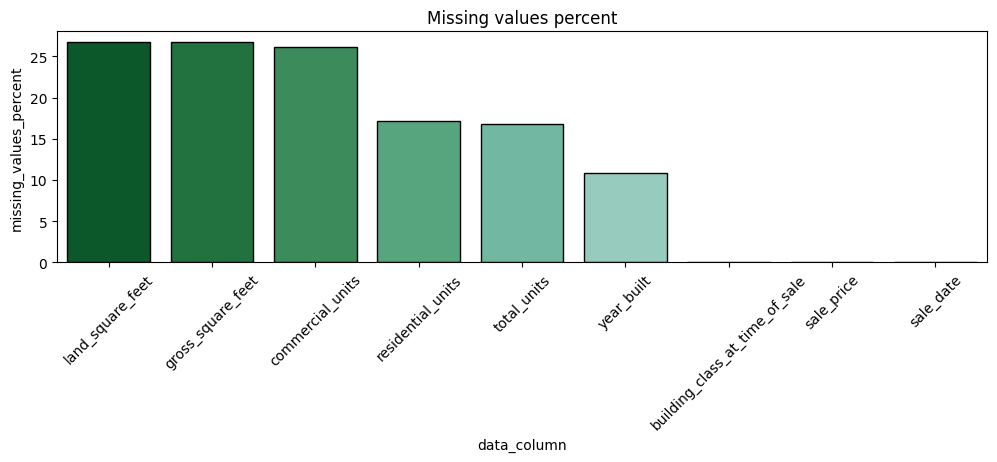

In [ ]:
# bar-chart of missing values seaborn

# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 3))
sns.barplot(data=missing_per_colulmn, x='data_column', y='missing_values_percent',hue='data_column',
                palette=sns.color_palette("BuGn_r", n_colors=missing_per_colulmn.shape[0] ), ec='k', legend=False, ax=ax).set_title('Missing values percent')

ax.tick_params(axis='x', labelrotation=45)


In [ ]:
# based on data context; any missing residential units imply there were no residential units; same case to commercial units
# total units are calculated by adding residential uniits and commercial units
df.residential_units=np.select([df.residential_units.isna()],[0])
df.commercial_units=np.select([df.commercial_units.isna()],[0])
df.total_units =  df.residential_units+df.commercial_units

pd.DataFrame({
  'data_column':['residential_units','commercial_units','total_units'],
  'missing_values_percent':[len(df.loc[df.residential_units.isna()])*100/df.shape[0],
                            len(df.loc[df.commercial_units.isna()])*100/df.shape[0],
                            len(df.loc[df.total_units.isna()])*100/df.shape[0]]
  })

,data_column,missing_values_percent
0,residential_units,0.0
1,commercial_units,0.0
2,total_units,0.0


In [ ]:
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,215000.0,2023-04-18
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,570000.0,2023-08-23
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1.0,A1,0.0,2023-04-14
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,1911.0,4080.0,1931.0,1.0,S0,0.0,2023-10-24
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1.0,B9,350000.0,2023-06-26


In [ ]:
# ## datarows missing key data points will not be useful in analysis thus we drop rows if the following fields are all blank
# residential_units 	commercial_units 	total_units 	land_square_feet 	gross_square_feet
# year_built 	tax_class_at_time_of_sale
# building_class_at_time_of_sale 	sale_price 	sale_date
df.drop(
    df.loc[(df.total_units==0) & (df.land_square_feet.isnull())&(df.year_built.isnull())&(df.tax_class_at_time_of_sale.isnull()) &
           (df.building_class_at_time_of_sale.isnull()) & (df.sale_price.isnull()) ].index,inplace=True)

In [ ]:
df.shape

(5606, 21)

In [ ]:
# re-checking % missing values per column
missing_per_colulmn = pd.DataFrame({
    'data_column':['residential_units','commercial_units','total_units','land_square_feet','gross_square_feet','year_built'
    ,'building_class_at_time_of_sale','sale_price','sale_date'],
    'missing_values_percent':[len(df.loc[df.residential_units.isna()])*100/df.shape[0],
                              len(df.loc[df.commercial_units.isna()])*100/df.shape[0],
                              len(df.loc[df.total_units.isna()])*100/df.shape[0],
                              len(df.loc[df.land_square_feet.isna()])*100/df.shape[0],
                              len(df.loc[df.gross_square_feet.isna()])*100/df.shape[0],
                              len(df.loc[df.year_built.isna()])*100/df.shape[0],
                              len(df.loc[df.building_class_at_time_of_sale.isna()])*100/df.shape[0],
                              len(df.loc[df.sale_price.isna()])*100/df.shape[0],
                              len(df.loc[df.sale_date.isna()])*100/df.shape[0]]
    })
missing_per_colulmn.sort_values(['missing_values_percent'],ascending=False)

,data_column,missing_values_percent
3,land_square_feet,26.614342
4,gross_square_feet,26.614342
5,year_built,10.774171
0,residential_units,0.000000
1,commercial_units,0.000000
2,total_units,0.000000
6,building_class_at_time_of_sale,0.000000
7,sale_price,0.000000
8,sale_date,0.000000


In [ ]:
# for missing square feet values; we dont have enough info to manually input values: we can input missing values with average, if we are to run ML models : done in the next stage
# for missing year_built; we can leave the data as it is understandable to have blank year built (take as unknown year built)
df.loc[df.gross_square_feet.isna()]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
34,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,NaN,D4,"463 EAST 178 STREET, 1D",NaN,...,0,0,0,NaN,NaN,1935.0,2.0,D4,98000.0,2023-11-20
35,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,NaN,D4,"463 EAST 178TH STREET, 2F",NaN,...,0,0,0,NaN,NaN,1935.0,2.0,D4,70000.0,2023-01-10
36,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,NaN,D4,"463 EAST 178TH STREET, 6B",NaN,...,0,0,0,NaN,NaN,1935.0,2.0,D4,55000.0,2023-09-14
325,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1019,NaN,R3,"2861 ELY AVENUE, 1",1,...,0,0,0,NaN,NaN,2008.0,1.0,R3,0.0,2023-05-22
326,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1121,NaN,R3,"2805 ELY AVENUE, 3",3,...,0,0,0,NaN,NaN,2008.0,1.0,R3,418000.0,2023-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,NaN,D4,"4295 WEBSTER AVENUE, 3D",NaN,...,0,0,0,NaN,NaN,1957.0,2.0,D4,285000.0,2023-11-02
5605,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,NaN,D4,"4295 WEBSTER AVENUE, 3I",NaN,...,0,0,0,NaN,NaN,1957.0,2.0,D4,125000.0,2023-05-09
5606,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,NaN,D4,"4295 WEBSTER AVENUE, 4K",NaN,...,0,0,0,NaN,NaN,1957.0,2.0,D4,114500.0,2023-03-01
5607,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,NaN,D4,"4295 WEBSTER AVENUE, 5C",NaN,...,0,0,0,NaN,NaN,1957.0,2.0,D4,135000.0,2023-10-16


### Replacing missing values in


1.  land_square_feet	26.614342
2.	gross_square_feet	26.614342



In [ ]:
df['land_square_feet'] = df.land_square_feet.fillna(df.land_square_feet.mean())
df['gross_square_feet'] = df.gross_square_feet.fillna(df.gross_square_feet.mean())


In [ ]:
# re-checking % missing values per column
missing_per_colulmn = pd.DataFrame({
    'data_column':['residential_units','commercial_units','total_units','land_square_feet','gross_square_feet','year_built'
    ,'building_class_at_time_of_sale','sale_price','sale_date'],
    'missing_values_percent':[len(df.loc[df.residential_units.isna()])*100/df.shape[0],
                              len(df.loc[df.commercial_units.isna()])*100/df.shape[0],
                              len(df.loc[df.total_units.isna()])*100/df.shape[0],
                              len(df.loc[df.land_square_feet.isna()])*100/df.shape[0],
                              len(df.loc[df.gross_square_feet.isna()])*100/df.shape[0],
                              len(df.loc[df.year_built.isna()])*100/df.shape[0],
                              len(df.loc[df.building_class_at_time_of_sale.isna()])*100/df.shape[0],
                              len(df.loc[df.sale_price.isna()])*100/df.shape[0],
                              len(df.loc[df.sale_date.isna()])*100/df.shape[0]]
    })
missing_per_colulmn.sort_values(['missing_values_percent'],ascending=False)

,data_column,missing_values_percent
5,year_built,10.774171
0,residential_units,0.000000
1,commercial_units,0.000000
2,total_units,0.000000
3,land_square_feet,0.000000
4,gross_square_feet,0.000000
6,building_class_at_time_of_sale,0.000000
7,sale_price,0.000000
8,sale_date,0.000000


### Discuss methods to identify and handle duplicate observations within the dataset. Emphasize the importance of maintaining a single source of truth for each observation to prevent redundancy and ensure reliable business decisions.

In [ ]:
# there are no duplicated rows in the data transformed thus far
df.duplicated().value_counts()

False    5606
dtype: int64

####Explore techniques for identifying outliers in the dataset, such as sorting, visualization tools (e.g., boxplots, histograms, scatterplots), and statistical methods like Z-scores. Discuss the impact of outliers on data analysis and decision-making and explore potential strategies for handling them.

In [ ]:
df.columns

Index(['neighborhood', 'building_class_category', 'tax_class_at_present',
       'block', 'lot', 'building_class_at_present', 'address', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

Text(0.5, 1.0, 'sale price')

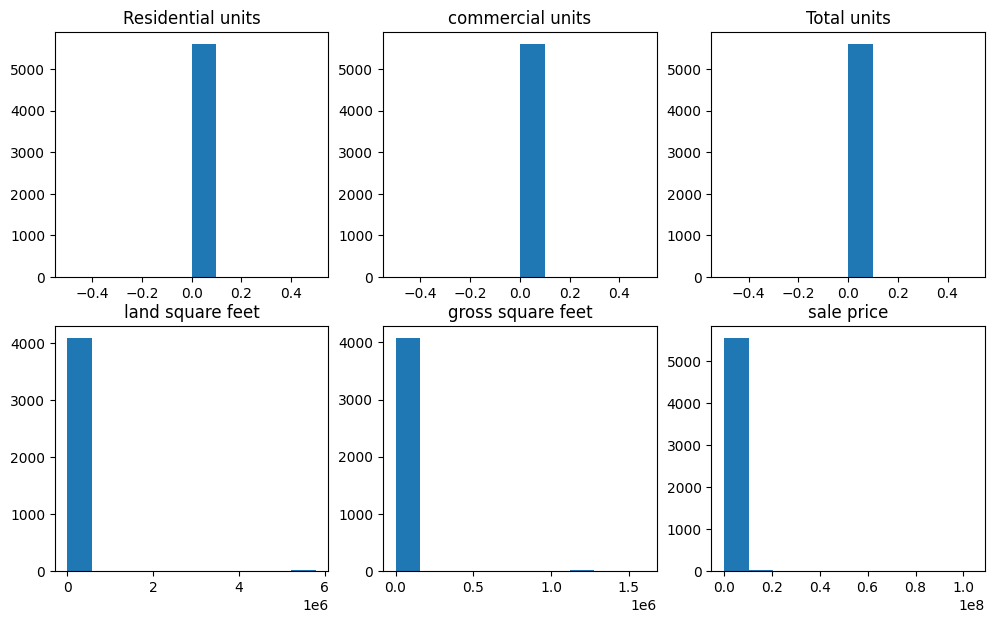

In [ ]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 3,figsize=(12,7))

axis[0, 0].hist(df.residential_units )
axis[0, 0].set_title("Residential units")

axis[0, 1].hist(df.commercial_units.tolist() )
axis[0, 1].set_title("commercial units")

axis[0, 2].hist(df.total_units.tolist() )
axis[0, 2].set_title("Total units")


axis[1, 0].hist(df.land_square_feet )
axis[1, 0].set_title("land square feet")

axis[1, 1].hist(df.gross_square_feet.tolist() )
axis[1, 1].set_title("gross square feet")

axis[1, 2].hist(df.sale_price.tolist() )
axis[1, 2].set_title("sale price")


In [ ]:
#  as from above land square feet and gross square feet has outlier values
# this can impact information generated from this data eg mean
df.loc[df.gross_square_feet>1E6]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,land_square_feet_imputed,gross_square_feet
350,2,BAYCHESTER,08 RENTALS - ELEVATOR APARTMENTS,2,4905,1,NaN,D3,1155 EAST 225 STREET,NaN,...,0,1003262.0,1028976.0,1951.0,2.0,D3,0.0,2023-03-15,1003262.0,1028976.0
1606,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DR, E14",NaN,...,0,5799632.0,1598812.0,1973.0,4.0,E9,575000.0,2023-04-27,5799632.0,1598812.0
1607,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DRIVE, C24",NaN,...,0,5799632.0,1598812.0,1973.0,4.0,E9,1150000.0,2023-04-11,5799632.0,1598812.0
1608,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DRIVE, C25",NaN,...,0,5799632.0,1598812.0,1973.0,4.0,E9,1150000.0,2023-04-11,5799632.0,1598812.0
1609,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DRIVE, D12",NaN,...,0,5799632.0,1598812.0,1973.0,4.0,E9,0.0,2023-04-27,5799632.0,1598812.0
1610,2,HUNTS POINT,30 WAREHOUSES,4,2781,500,NaN,E9,"355 FOOD CENTER DRIVE, D12",NaN,...,0,5799632.0,1598812.0,1973.0,4.0,E9,575000.0,2023-04-27,5799632.0,1598812.0
1615,2,HUNTS POINT,41 TAX CLASS 4 - OTHER,4,2770,1,NaN,Z9,"151 HUNTS POINT MARKET, 149",NaN,...,0,5612000.0,1172005.0,1960.0,4.0,Z9,2000000.0,2023-11-08,5612000.0,1172005.0
1616,2,HUNTS POINT,41 TAX CLASS 4 - OTHER,4,2770,1,NaN,Z9,"151 HUNTS POINT MARKET, 149A",NaN,...,0,5612000.0,1172005.0,1960.0,4.0,Z9,2000000.0,2023-11-08,5612000.0,1172005.0
1617,2,HUNTS POINT,41 TAX CLASS 4 - OTHER,4,2770,1,NaN,Z9,"151 HUNTS POINT MARKET, 150",NaN,...,0,5612000.0,1172005.0,1960.0,4.0,Z9,2000000.0,2023-11-08,5612000.0,1172005.0
1618,2,HUNTS POINT,41 TAX CLASS 4 - OTHER,4,2770,1,NaN,Z9,"151 HUNTS POINT MARKET, 150A",NaN,...,0,5612000.0,1172005.0,1960.0,4.0,Z9,2000000.0,2023-11-08,5612000.0,1172005.0


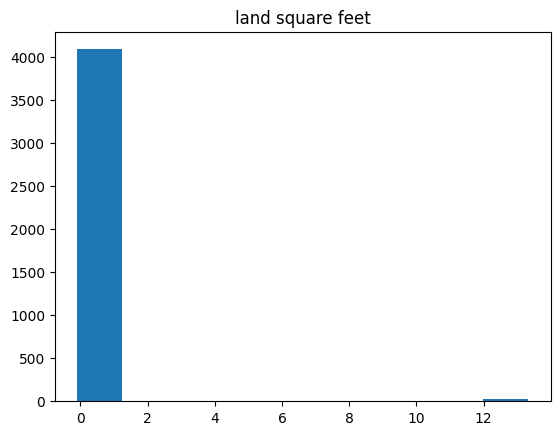

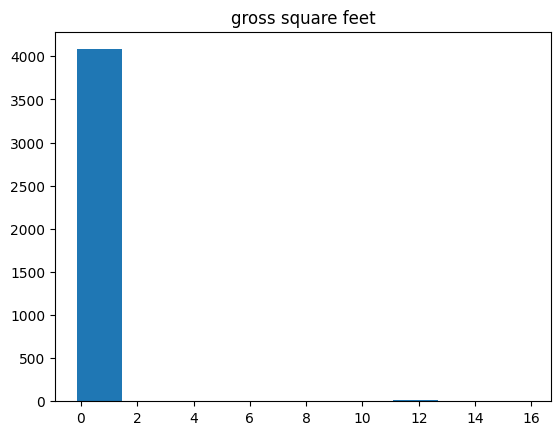

In [ ]:
# if were are to run an ML model we would need to transform outliers by standardizing otherwise the above outliers might be correct data,
# there are no fixed real estate sizes

# transforming land_square_feet and gross_square_feet
df.land_square_feet_transformed=(df.land_square_feet - df.land_square_feet.mean())/df.land_square_feet.std()
df.gross_square_feet_transformed=(df.gross_square_feet - np.mean(df.gross_square_feet))/np.std(df.gross_square_feet)


plt.hist(df.land_square_feet_transformed)
plt.title("land square feet")
plt.show()

plt.hist(df.gross_square_feet_transformed )
plt.title("gross square feet")
plt.show()


In [ ]:
cond_subsets = {}
for cond_value in df['OverallCond'].unique():
    cond_subsets[cond_value] = df[df['OverallCond'] == cond_value]['SalePrice']